In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [12]:
#Loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [13]:
# Normalizing the pixel values (0-255 to 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

In [14]:
# Reshape for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [15]:
#CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes
])

In [16]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Training the model
epochs = 10 
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8926 - loss: 0.3549 - val_accuracy: 0.9855 - val_loss: 0.0417
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9842 - loss: 0.0500 - val_accuracy: 0.9853 - val_loss: 0.0466
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9883 - loss: 0.0343 - val_accuracy: 0.9903 - val_loss: 0.0313
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9913 - loss: 0.0266 - val_accuracy: 0.9894 - val_loss: 0.0304
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9942 - loss: 0.0185 - val_accuracy: 0.9903 - val_loss: 0.0308
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9944 - loss: 0.0157 - val_accuracy: 0.9908 - val_loss: 0.0323
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9961 - loss: 0.0115 - val_accuracy: 0.9900 - val_loss: 0.0341
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9969 -

In [18]:
# Evaluating the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9847 - loss: 0.0660
Test Accuracy: 98.85%


In [19]:
model.save("digit_cnn_model.keras")  

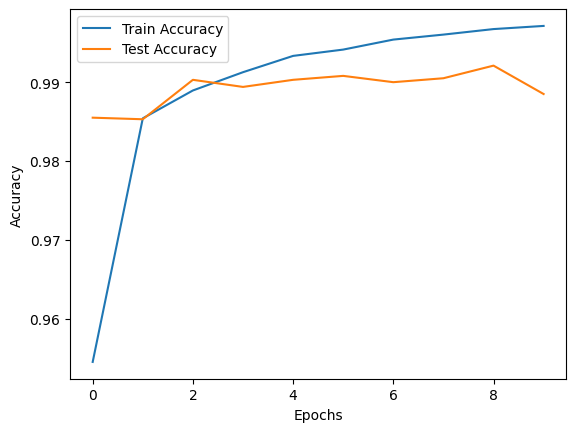

In [20]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


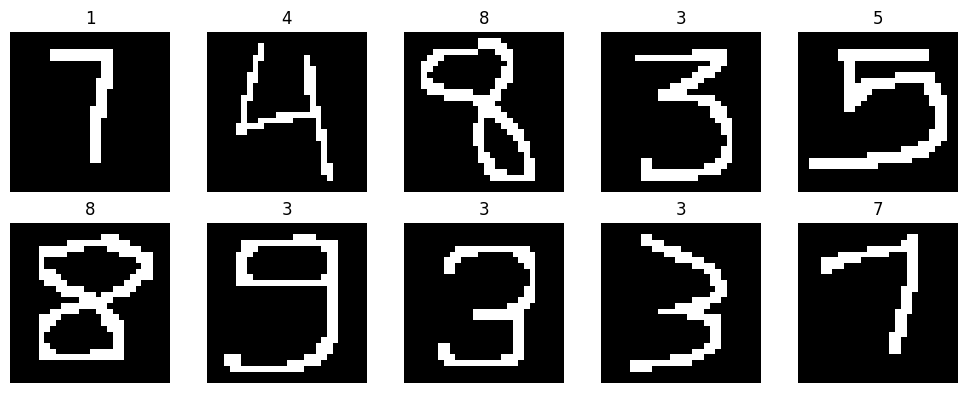

In [26]:
import tensorflow as tf
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

model = tf.keras.models.load_model("/Users/sivakarthick/Hub/Handwritten_digit/digit_cnn_model.keras")

image_folder = "/Users/sivakarthick/Hub/Handwritten_digit/test"

def predictimg(folder_path, model, num_images=10):
    image_paths = [os.path.join(folder_path, img) for img in os.listdir(folder_path) if img.endswith(('.png', '.jpg', '.jpeg'))]
    
    if len(image_paths) < num_images:
        print(f"Only {len(image_paths)} images available, displaying all.")
        num_images = len(image_paths)

    random.shuffle(image_paths)
    selected_images = image_paths[:num_images]  

    cols = 5  # Number of columns in the grid
    rows = (num_images // cols) + (num_images % cols > 0)  

    plt.figure(figsize=(cols * 2, rows * 2))  

    for i, img_path in enumerate(selected_images):
        img = image.load_img(img_path, target_size=(28, 28), color_mode="grayscale")
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction)

        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(f"{predicted_class}", fontsize=12)

    plt.tight_layout()
    plt.show()

predictimg(image_folder, model)
